In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
genes = ['Plin1','Ucp1']

RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_Ncount.tsv', sep='\t')
RPF = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_Ncount.tsv', sep='\t')
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_Ncount.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
PT = pd.merge(PT_conv, PT, on='uniprot_id')
PT = pd.merge(RNA[['gene_id','gene_name']], PT, on='gene_id')

tables = {'RNA':RNA, 'RPF':RPF, 'PT':PT}
data_dict = {}
for lib in ['RNA','RPF','PT']:
    tmp = pd.merge(pd.DataFrame({'gene_name':genes}), tables[lib], on='gene_name').set_index('gene_name',drop=True).iloc[:,-9:].T
    tmp = np.log2(tmp)
    tmp = tmp.reset_index(drop=False).rename(columns={'index':'Cond'})
    tmp['Day'] = tmp['Cond'].str[-2]
    tmp['rep'] = tmp['Cond'].str[-1]

    for gene in genes:
        tmp[gene] = tmp[gene] - tmp.loc[0:2, gene].mean()

    tmp = tmp.melt(id_vars=['Cond','Day','rep'])
    
    data_dict[lib] = tmp

    display(tmp)


# RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_log2FC.tsv', sep='\t')
# RPF = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_log2FC.tsv', sep='\t')
# PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_log2FC.tsv', sep='\t')
# PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
# PT = pd.merge(PT_conv, PT, on='uniprot_id')
# PT = pd.merge(RNA[['gene_id','gene_name']], PT, on='gene_id')


# tables = {'RNA':RNA, 'RPF':RPF, 'PT':PT}
# data_dict = {}
# for lib in ['RNA','RPF','PT']:
#     tmp = pd.merge(pd.DataFrame({'gene_name':genes}), tables[lib], on='gene_name').set_index('gene_name',drop=True).iloc[:,-6:].T
#     # tmp = np.log2(tmp)
#     tmp = tmp.reset_index(drop=False).rename(columns={'index':'Cond'})
#     tmp['Day'] = tmp['Cond'].str[-2]
#     tmp['rep'] = tmp['Cond'].str[-1]
#     tmp = tmp.melt(id_vars=['Cond','Day','rep'])
    
#     data_dict[lib] = tmp

#     display(tmp)

,Cond,Day,rep,gene_name,value
0,R0a,0,a,Plin1,0.069428
1,R0b,0,b,Plin1,-0.752129
2,R0c,0,c,Plin1,0.682700
3,R4a,4,a,Plin1,14.366543
4,R4b,4,b,Plin1,13.763504
5,R4c,4,c,Plin1,14.413380
6,R8a,8,a,Plin1,14.256797
7,R8b,8,b,Plin1,14.446107
8,R8c,8,c,Plin1,14.379821
9,R0a,0,a,Ucp1,0.000000


,Cond,Day,rep,gene_name,value
0,P0a,0,a,Plin1,-0.222790
1,P0b,0,b,Plin1,0.165387
2,P0c,0,c,Plin1,0.057403
3,P4a,4,a,Plin1,7.988450
4,P4b,4,b,Plin1,7.398321
5,P4c,4,c,Plin1,8.010674
6,P8a,8,a,Plin1,8.302674
7,P8b,8,b,Plin1,8.126267
8,P8c,8,c,Plin1,7.705519
9,P0a,0,a,Ucp1,-0.185961


,Cond,Day,rep,gene_name,value
0,PT0a,0,a,Plin1,0.132810
1,PT0b,0,b,Plin1,-0.090986
2,PT0c,0,c,Plin1,-0.041824
3,PT4a,4,a,Plin1,1.868951
4,PT4b,4,b,Plin1,1.104773
5,PT4c,4,c,Plin1,1.740435
6,PT8a,8,a,Plin1,2.660761
7,PT8b,8,b,Plin1,2.643521
8,PT8c,8,c,Plin1,2.537692
9,PT0a,0,a,Ucp1,0.251224


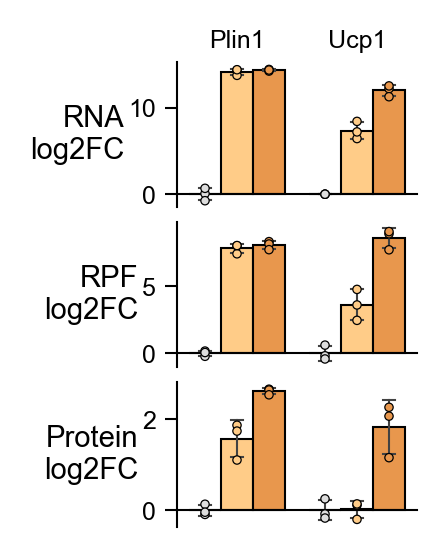

<Figure size 640x480 with 0 Axes>

In [4]:
sF = 1 # Size factor
wgap = 0.3
hgap = 0.1
nrow, ncol = 3, 1

height_ratios = [0.45]*nrow
width_ratios = [0.8]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

row = 0
col = 0
for lib in ['RNA','RPF','PT']:
    ax = fig.add_subplot(grid[row,col])

    sns.barplot(data=data_dict[lib], x="gene_name", y="value",
                hue='Day',
                palette=['#DDDDDD','#FFCC88','#E8974D'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.5}, capsize=.3,
                ax=ax, linewidth = 0.5, edgecolor='k',
                legend=False)

    sns.stripplot(data=data_dict[lib], x="gene_name", y="value",
                hue='Day', dodge=True,
                palette=['#DDDDDD','#FFCC88','#E8974D'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)

    if row==0:
        ax.text(0, 17, 'Plin1', ha='center', fontsize=6)
        ax.text(1, 17, 'Ucp1',  ha='center', fontsize=6)

    ax.set_xticks([])
    ax.tick_params(width=0.5, length=3, pad=2)

    ax.set_xlabel('', labelpad=1)
    ax.set_ylabel(lib.replace('PT','Protein')+'\nlog2FC', labelpad=1, rotation=0, va='center', ha='right')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_position('zero')

    row+=1

plt.savefig('adi_Marker_Exp_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()